## 过拟合与欠拟合

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(666)
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

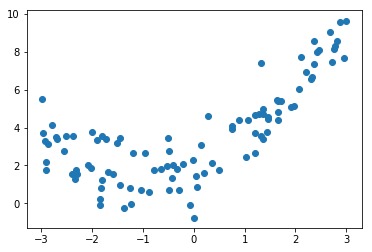

In [15]:
plt.scatter(X, y)

### 使用简单线性回归，模型欠拟合

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

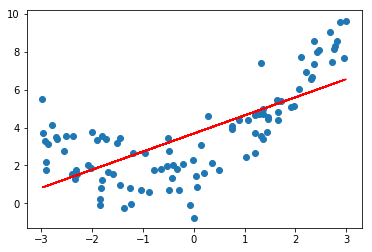

In [17]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(X, y_predict, color='r')

### 使用多项式回归，调整多项式最高次幂参数，得到不同模型

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [19]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [20]:
poly2_reg = PolynomialRegression(2)
poly2_reg.fit(X, y)
poly2_reg.score(X, y)

0.8196892855998191

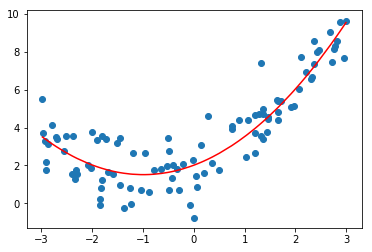

In [21]:
y2_predict = poly2_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

In [22]:
poly10_reg = PolynomialRegression(10)
poly10_reg.fit(X, y)
poly10_reg.score(X, y)

0.8275487827443722

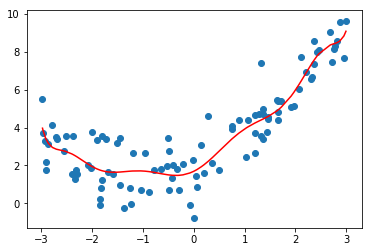

In [23]:
y10_predict = poly10_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

In [24]:
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X, y)
poly100_reg.score(X, y)

0.8872435768834439

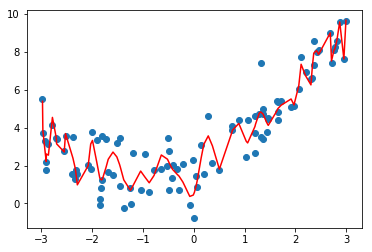

In [25]:
y100_predict = poly100_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

## train test split 的意义——使用测试集测试模型泛化能力

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(666)
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

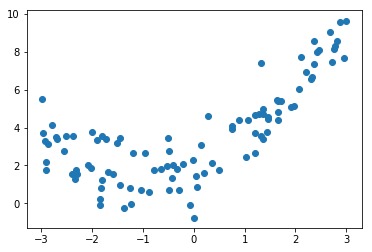

In [5]:
plt.scatter(X, y)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.5437074558433677

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [8]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [9]:
poly2_reg = PolynomialRegression(2)
poly2_reg.fit(X_train, y_train)
poly2_reg.score(X_test, y_test)

0.8348374397431063

In [10]:
poly10_reg = PolynomialRegression(10)
poly10_reg.fit(X_train, y_train)
poly10_reg.score(X_test, y_test)

0.8106397218492942

In [11]:
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X_train, y_train)
poly100_reg.score(X_test, y_test)

-2893100752.9521084

## 学习曲线

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
np.random.seed(666)
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

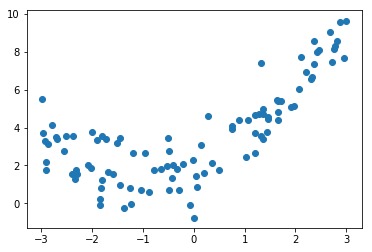

In [37]:
plt.scatter(X, y)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [39]:
 X_train.shape, X_test.shape

((75, 1), (25, 1))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    y_test_predict = lin_reg.predict(X_test)
    
    train_score.append(mean_squared_error(y_train_predict, y_train[:i]))
    test_score.append(mean_squared_error(y_test_predict, y_test))   

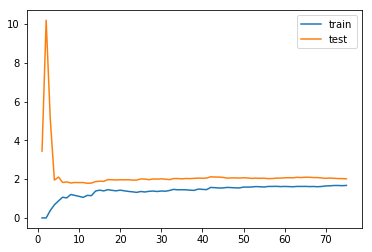

In [42]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label='train')
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label='test')
plt.legend()

In [43]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test): #algo代表不同算法
    train_score = []
    test_score = []
    for i in range(1, len(x_train)+1):
        algo.fit(x_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(x_train[:i])
        y_test_predict = algo.predict(x_test)
        train_score.append(mean_squared_error(y_train_predict, y_train[:i]))
        test_score.append(mean_squared_error(y_test_predict, y_test))
    
    plt.plot([i for i in range(1,76)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1,76)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(x_train)+1, 0, 4]) #限定坐标显示的范围，因为主要还是比较t_train和t_test相近的地方。

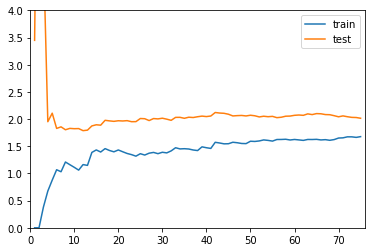

In [44]:
# 欠拟合
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [46]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

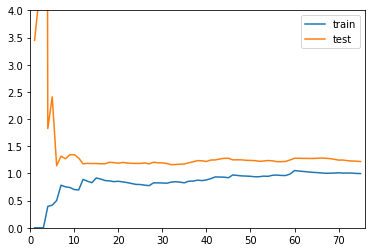

In [47]:
# 最佳
poly2_reg = PolynomialRegression(2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

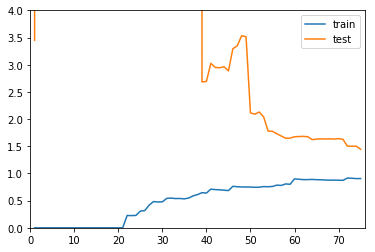

In [48]:
# 过拟合
poly20_reg = PolynomialRegression(20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

## k-folds 交叉验证

In [49]:
import numpy as np
from sklearn import datasets

In [50]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

### 使用train_test_split进行超参数的调整

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0

for k in range(2,11):
    for p in range(1,6):
        knn = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if best_score < score:
            best_score = score
            best_p = p
            best_k =k

print("best k =", best_k)
print("best p =", best_p)
print("best score", best_score)

best k = 3
best p = 4
best score 0.9860917941585535


### 使用交叉验证进行超参数的调整

In [59]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3)

array([0.98895028, 0.97777778, 0.96629213])

In [75]:
best_score, best_p, best_k = 0, 0, 0

for k in range(2,11):
    for p in range(1,6):
        knn = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
        score = np.mean(scores)
        if best_score < score:
            best_score = score
            best_p = p
            best_k =k

print("best k =", best_k)
print("best p =", best_p)
print("best score", best_score)

best k = 2
best p = 1
best score 0.9776733962841108


In [62]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=1)

best_knn_clf.fit(X_train,y_train)
best_knn_clf.score(X_test,y_test)

0.9749652294853964

### 回顾网格搜索

In [69]:
from sklearn.model_selection import GridSearchCV  # CV即cross validation

In [73]:
param_grid = [  
    {  
        'weights': ['distance'],  
        'n_neighbors': [i for i in range(2, 11)],  
        'p': [i for i in range(1, 6)]  
    } 
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   56.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [82]:
grid_search.best_score_

0.9823747680890538

In [83]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [84]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

1.0

## 模型正则化

In [85]:
import numpy as np  
import matplotlib.pyplot as plt 

In [89]:
np.random.seed(42)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

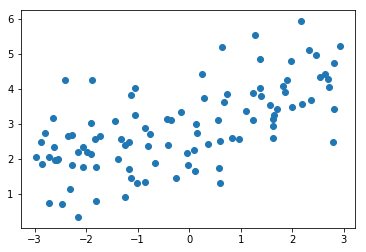

In [91]:
plt.scatter(x, y)
plt.show()

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [93]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())    
    ])

In [96]:
def plot_model(model):   #绘制图像的代码封装，为了方便使用，直接传入模型即可
    X_plot = np.linspace(-3, 3, 100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [98]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401085999025

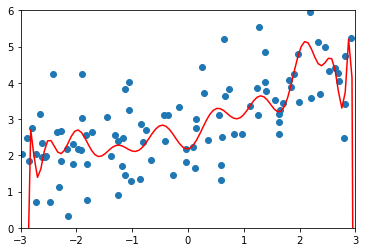

In [99]:
plot_model(poly_reg)

### 岭回归正则化（限制参数的大小） Ridge Regression

￼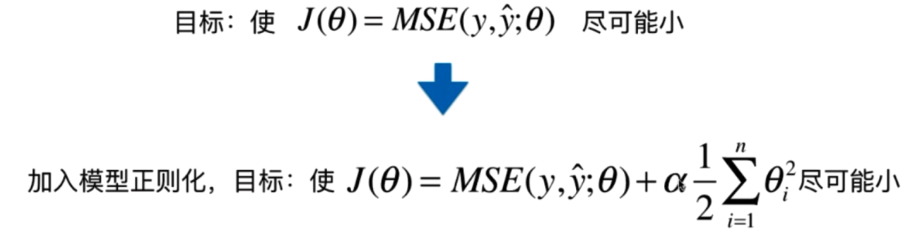

In [102]:
from sklearn.linear_model import Ridge

def RridgeRegression(degree,alpha): #修改管道
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))    #加入岭回归
    ])

In [103]:
ridge1_reg = RridgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

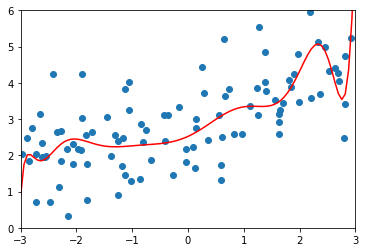

In [104]:
plot_model(ridge1_reg)

In [105]:
ridge2_reg = RridgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

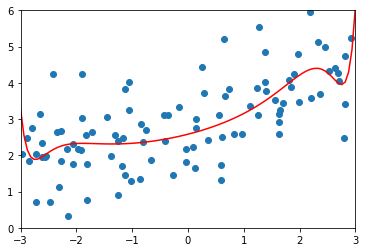

In [106]:
plot_model(ridge2_reg)

In [107]:
ridge3_reg = RridgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

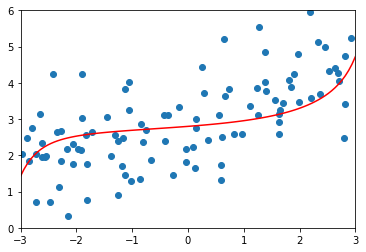

In [108]:
plot_model(ridge3_reg)

In [109]:
ridge4_reg = RridgeRegression(20, 1000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8404103153255003

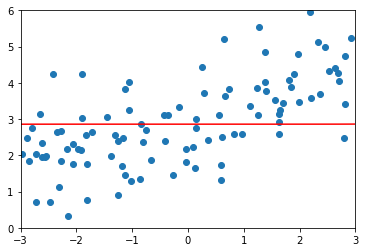

In [110]:
# 当alpha很大的时候，为了使目标函数小，所以会使系数θ趋近于0，因此会得出几乎平行的一条直线。
plot_model(ridge4_reg)

### LASSO回归正则化

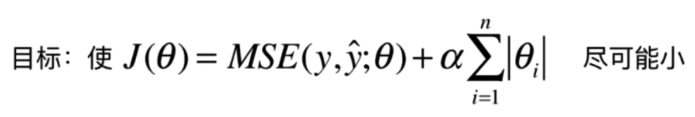

In [111]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha): #修改管道
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))    #加入Lasso回归
    ])

In [116]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259966

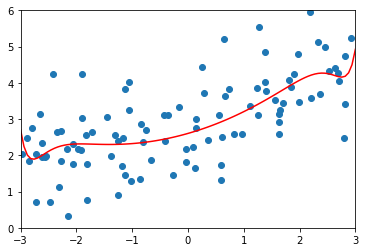

In [117]:
plot_model(lasso1_reg)

In [119]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

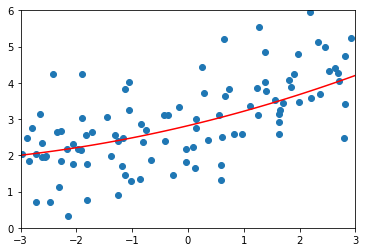

In [120]:
plot_model(lasso2_reg)

In [121]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

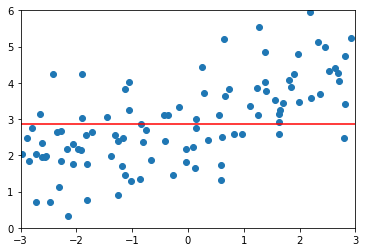

In [123]:
# lasso会趋向于使得一部分θ值变为0，所以可以作为特征选取，这就是selection operator的含义
plot_model(lasso3_reg)